<h2><center>California K-12 Public Schools</center></h2>
<h1><center>Meeting the Standards Projection</center></h1>


   <img src='images/shutterstock_213333985.jpeg' width="700">
   
   **Credit:**  [shutterstock](https://www.shutterstock.com/image-photo/school-books-on-desk-education-concept-213333985)


In [70]:
# Load relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings

warnings.filterwarnings("ignore")  # Suppress all warnings

# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 
import scipy.stats as stats
import sklearn

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_context("poster")
sns.set(style='ticks')

# Modeling
from sklearn import linear_model, preprocessing
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm 
from statsmodels.graphics.api import abline_plot
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from sklearn.linear_model import Lasso

In [3]:
# load file
language = pd.read_csv('data/df_language_with_dummies')

# copy original df
language_df = language.copy()

# Drop columns not useful for modeling
language_df = language_df.drop(['School Name', 'School Code', 'Zip Code', 'County Name', 'County Code',
       'Latitude', 'Longitude'], axis=1)

# Transform percentage to 0-1
language_df[['Fluent English', 'English Learner', 'Ever-Els', 'Migrant',
       'Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above']] = language_df[['Fluent English', 'English Learner', 'Ever-Els', 'Migrant',
       'Male', 'Female', 'Military', 'Non Military',
       'Homeless', 'Non Homeless', 'Disadvantaged', 'Not Disadvantaged',
       'Black', 'Native American', 'Asian', 'Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad',
       'Some College', 'College Grad', 'Graduate School',
       'Percentage Standard Met and Above']].div(100)

# Dimensions of the dataset 
language_df.shape

(9646, 58)

In [4]:
# Overview of the data check all features are numeric
language_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9646 entries, 0 to 9645
Data columns (total 58 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Median Household Income            9646 non-null   float64
 1   CAASPP Reported Enrollment         9646 non-null   float64
 2   CAASPP Reported Enrollment-Dummy   9646 non-null   int64  
 3   Enrollment K-12                    9646 non-null   float64
 4   Enrollment K-12-Dummy              9646 non-null   int64  
 5   Total Revenue per Pupil            9646 non-null   float64
 6   Total Expenditures per Pupil       9646 non-null   float64
 7   Free Meal Count K-12               9646 non-null   float64
 8   Current Expense Per ADA            9646 non-null   float64
 9   Fluent English                     9646 non-null   float64
 10  Fluent English-Dummy               9646 non-null   int64  
 11  English Learner                    9646 non-null   float

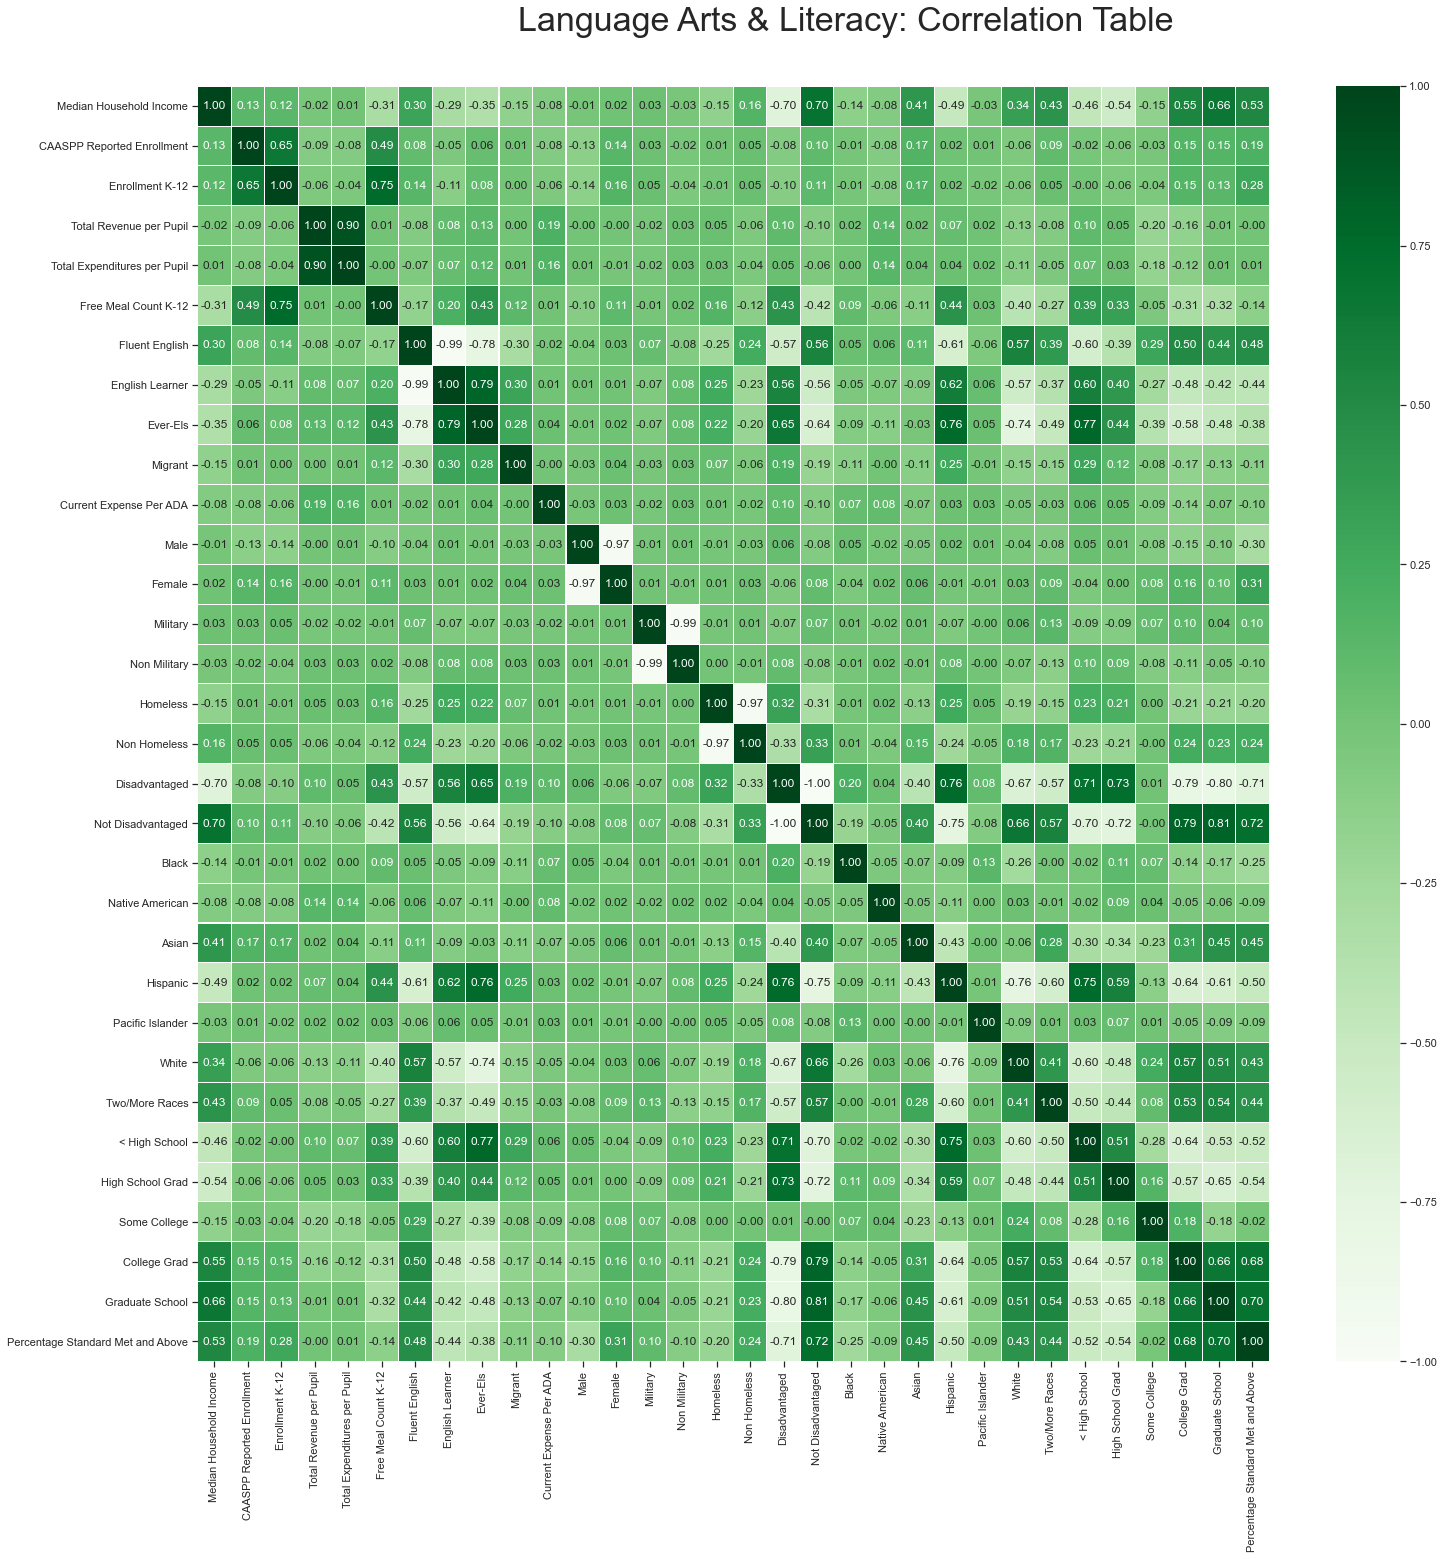

In [5]:
table = language_df[['Median Household Income', 'CAASPP Reported Enrollment','Enrollment K-12',
       'Total Revenue per Pupil','Total Expenditures per Pupil', 'Free Meal Count K-12',
       'Fluent English','English Learner', 'Ever-Els', 'Migrant',            
       'Current Expense Per ADA', 'Male', 'Female','Military', 'Non Military','Homeless','Non Homeless',
       'Disadvantaged','Not Disadvantaged', 'Black','Native American','Asian','Hispanic', 'Pacific Islander',
       'White', 'Two/More Races', '< High School', 'High School Grad', 'Some College','College Grad',
       'Graduate School','Percentage Standard Met and Above']]

# Run correlation on table constructed with count instead of percentage values
corrmat = table.corr()
f, ax = plt.subplots(figsize=(24, 22))
hm = sns.heatmap(round(corrmat,2), annot=True, cmap="Greens", ax=ax, fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Language Arts & Literacy: Correlation Table', fontsize=34)

In [6]:
print(language_df['Percentage Standard Met and Above'].min())
print(language_df['Percentage Standard Met and Above'].max())

0.0
1.0


Text(0, 0.5, 'Number of schools')

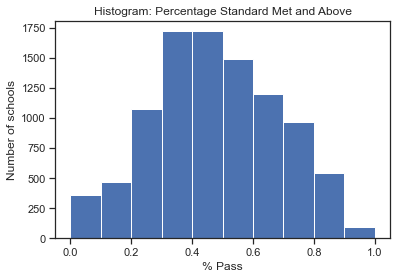

In [7]:
# distrubution of the dependent var
plt.hist(language_df['Percentage Standard Met and Above'])
plt.title("Histogram: Percentage Standard Met and Above")
plt.xlabel("% Pass")
plt.ylabel("Number of schools")

## Applying the Machine Learning models:
This is a regression problem, in supervised learning. Here we have used the following regression models:

- Linear Regression
- Logistic Regression
- Decision Tree
- Random Forest
- Gradient Boost

Evaluating the performance of a model by training and testing on the same dataset can lead to the overfitting. Hence the model evaluation is based on splitting the dataset into train and validation set. But the performance of the prediction result depends upon the random choice of the pair of (train,validation) set. In order to overcome that, the Cross-Validation procedure is used where under the k-fold CV approach, the training set is split into k smaller sets, where a model is trained using k-1 of the folds as training data and the model is validated on the remaining part.

#### Train/Test Split

In [8]:
# response variable
y = language_df['Percentage Standard Met and Above']

# All columns from data in the explanatory variables X
X = language_df.drop(['Percentage Standard Met and Above'], axis=1)

# Split data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

# Check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right
print('X_train: ', X_train.shape, 'y_train: ', y_train.shape, 'X_test :' ,X_test.shape, 'y_test: ', y_test.shape)

X_train:  (7716, 57) y_train:  (7716,) X_test : (1930, 57) y_test:  (1930,)


## 1. LINEAR REGRESSION

### MODEL 1

- Using all features

1. sklearn

In [9]:
# Create linear model
rModel = linear_model.LinearRegression(normalize=True) # normalize=True parameter enables the handling of different scales

In [10]:
# Train model call .fit() method of rModel
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [11]:
# Predict on both x train and x test
y_tr_pred = rModel.predict(X_train)
y_te_pred = rModel.predict(X_test)

### Model Performance

In [12]:
# Evaluate the model call .score() on rModel with parameters X_train, y_train
print(rModel.score(X_train, y_train).round(4), rModel.score(X_test, y_test).round(4))

0.7396 0.7523


In [13]:
# MAE
median_mae = mean_absolute_error(y_train, y_tr_pred).round(4), mean_absolute_error(y_test, y_te_pred).round(4)

# MSE - train, test 
median_mse = mean_squared_error(y_train, y_tr_pred).round(4), mean_squared_error(y_test, y_te_pred).round(4)

# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)

#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

In [14]:
print ('Mean Absolute Error - train, test: ' + str(median_mae))
print ('Mean Squared Error - train, test: ' + str(median_mse))
print ('Root Mean Squared Error - train, test: ' + str(median_rmse))
print ('R-square - train, test: ' + str(median_r2))

Mean Absolute Error - train, test: (0.0804, 0.0785)
Mean Squared Error - train, test: (0.0112, 0.0103)
Root Mean Squared Error - train, test: (0.1057, 0.1015)
R-square - train, test: (0.7396, 0.7523)


Text(0, 0.5, 'Predicted values')

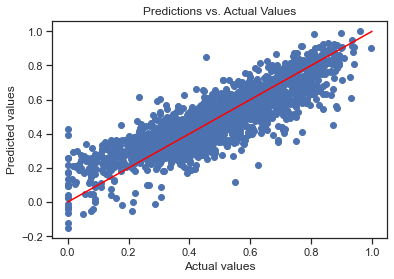

In [15]:
# Let's plot the predictions against the actual result. Use scatter()
plt.scatter(y_test, y_te_pred)

# Add a line for perfect correlation
plt.plot([x for x in range(0, 2)],[x for x in range(0, 2)], color='red')

# Label 
plt.title("Predictions vs. Actual Values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

Text(0, 0.5, 'Predicted values')

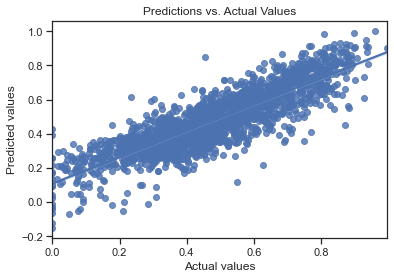

In [16]:
sns.regplot(y_test, y_te_pred)

# Label 
plt.title("Predictions vs. Actual Values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

### Ordinary Least Square Method (OLS)
2. Statsmodel

In [17]:
# Create constants for X, so the model knows its bounds
X = sm.add_constant(X)

In [18]:
# We can use almost identical code to create the third model, because it is the same algorithm, just different inputs
# Create the model
rModel2 = sm.OLS(y_train, X_train)
# Fit the model
rModel2_results = rModel2.fit()

In [19]:
rModel2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Percentage Standard Met and Above   R-squared:                       0.740
Model:                                           OLS   Adj. R-squared:                  0.738
Method:                                Least Squares   F-statistic:                     395.8
Date:                               Mon, 10 May 2021   Prob (F-statistic):               0.00
Time:                                       19:19:47   Log-Likelihood:                 6394.1
No. Observations:                               7716   AIC:                        -1.268e+04
Df Residuals:                                   7660   BIC:                        -1.229e+04
Df Model:                                         55                                         
Covariance Type:                           nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Median Household Income           -1.96e-07   7.52e-08     -2.604      0.009   -3.43e-07   -4.85e-08
CAASPP Reported Enrollment       -4.946e-05   6.88e-06     -7.187      0.000    -6.3e-05    -3.6e-05
CAASPP Reported Enrollment-Dummy    -0.2761      0.112     -2.454      0.014      -0.497      -0.056
Enrollment K-12                   5.054e-05   5.82e-06      8.691      0.000    3.91e-05    6.19e-05
Enrollment K-12-Dummy                0.0903      0.017      5.227      0.000       0.056       0.124
Total Revenue per Pupil             5.4e-06   8.51e-07      6.348      0.000    3.73e-06    7.07e-06
Total Expenditures per Pupil     -8.443e-07   8.13e-07     -1.038      0.299   -2.44e-06    7.49e-07
Free Meal Count K-12             -1.771e-05    1.1e-05     -1.610      0.108   -3.93e-05    3.86e-06
Current Expense Per ADA          -7.187e-07   2.65e-07     -2.708      0.007   -1.24e-06   -1.98e-07
Fluent English                       0.7708      0.076     10.204      0.000       0.623       0.919
Fluent English-Dummy                -0.0978      0.042     -2.344      0.019      -0.180      -0.016
English Learner                      0.4089      0.076      5.409      0.000       0.261       0.557
English Learner-Dummy               -0.0162      0.006     -2.571      0.010      -0.028      -0.004
Ever-Els                             0.1617      0.015     11.005      0.000       0.133       0.190
Ever-Els-Dummy                       0.0145      0.009      1.696      0.090      -0.002       0.031
Migrant                              0.4560      0.065      7.000      0.000       0.328       0.584
Migrant-Dummy                       -0.0237      0.005     -4.704      0.000      -0.034      -0.014
Male                                -0.2895      0.116     -2.488      0.013      -0.518      -0.061
Male-Dummy                           0.2447      0.040      6.103      0.000       0.166       0.323
Female                               0.2302      0.117      1.963      0.050       0.000       0.460
Female-Dummy                        -0.0455      0.025     -1.834      0.067      -0.094       0.003
Military                            -0.2190      0.168     -1.304      0.192      -0.548       0.110
Military-Dummy                       0.0156      0.004      3.645      0.000       0.007       0.024
Non Military                        -0.3110      0.168     -1.857      0.063      -0.639       0.017
Non Military-Dummy                  -0.2761      0.112     -2.454      0.014      -0.497      -0.056
Homeless                             0.6182      0.090      6.837      0.000       0.441  

In [20]:
# Make predictions of the dependent variable y. Use predict(), and plug in X_test as the parameter
y_te_pred = rModel2_results.predict(X_test)
y_tr_pred = rModel2_results.predict(X_train)

### Model Performance
- Using all features
    - MAE
    - MSE
    - RMSE
    - R_squared

In [21]:
# MAE
median_mae = mean_absolute_error(y_train, y_tr_pred).round(4), mean_absolute_error(y_test, y_te_pred).round(4)

# MSE - train, test 
median_mse = mean_squared_error(y_train, y_tr_pred).round(4), mean_squared_error(y_test, y_te_pred).round(4)

# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)

#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)


In [22]:
print ('Mean Absolute Error - train, test: ' + str(median_mae))
print ('Mean Squared Error - train, test: ' + str(median_mse))
print ('Root Mean Squared Error - train, test: ' + str(median_rmse))
print ('R-square - train, test: ' + str(median_r2))

Mean Absolute Error - train, test: (0.0804, 0.0785)
Mean Squared Error - train, test: (0.0112, 0.0103)
Root Mean Squared Error - train, test: (0.1056, 0.1015)
R-square - train, test: (0.7397, 0.7523)


Text(0, 0.5, 'Predicted values')

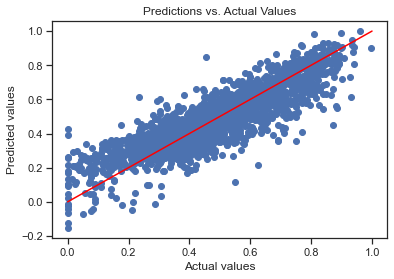

In [23]:
# Plot the predictions
# Build a scatterplot
plt.scatter(y_test, y_te_pred)

# Add a line for perfect correlation. Can you see what this line is doing? 
plt.plot([x for x in range(0,2)],[x for x in range(0,2)], color='red')

# Label 
plt.title("Predictions vs. Actual Values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

-------------------

# Refining Linear Model
### Select features using SelectKBest pipeline
- sklearn, SelectKBest

In [24]:
# Add SelectKBest as a step in the pipeline between `StandardScaler()` and `LinearRegression()`
# Don't forget to tell it to use `f_regression` as its score function
pipe = make_pipeline(
    StandardScaler(),
    SelectKBest(f_regression, k=55),
    LinearRegression()
)

In [25]:
# Fit the pipeline
pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(k=55,
                             score_func=<function f_regression at 0x7fab8bb3c680>)),
                ('linearregression', LinearRegression())])

# Cross Validation 
### Assess performance

In [26]:
cv_results = cross_validate(pipe, X_train, y_train, cv=5)

In [27]:
cv_scores = cv_results['test_score']
cv_scores

array([0.74655175, 0.7272973 , 0.73132412, 0.71574268, 0.74368309])

In [28]:
np.mean(cv_scores), np.std(cv_scores)

(0.7329197884788982, 0.011232904242415466)

In [29]:
np.round((np.mean(cv_scores) - 2 * np.std(cv_scores), np.mean(cv_scores) + 2 * np.std(cv_scores)), 2)

array([0.71, 0.76])

# GridSearchCV
### Hyperparameter search

In [30]:
#Call `pipe`'s `get_params()` method to get a dict of available parameters and print their names
#using dict's `keys()` method
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'standardscaler', 'selectkbest', 'linearregression', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'selectkbest__k', 'selectkbest__score_func', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__normalize'])

In [31]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [32]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=3, n_jobs=-1)

In [33]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(k=55,
                                                    score_func=<function f_regression at 0x7fab8bb3c680>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [34]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [35]:
#Print the `best_params_` attribute of `lr_grid_cv`
lr_grid_cv.best_params_

{'selectkbest__k': 55}

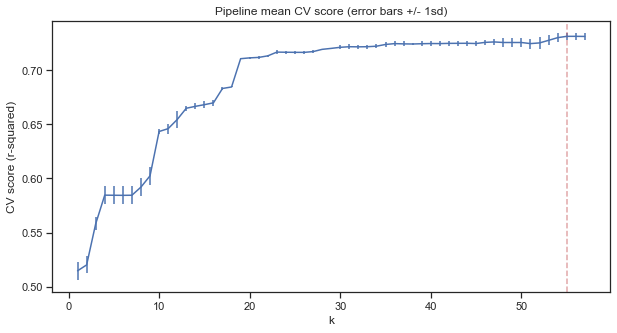

In [36]:
#Assign the value of k from the above dict of `best_params_` and assign it to `best_k`
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [37]:
selected = lr_grid_cv.best_estimator_.named_steps.selectkbest.get_support()

#### Select features according to the k highest scores

In [38]:
# sorting the values in descending order
coefs = lr_grid_cv.best_estimator_.named_steps.linearregression.coef_
features = X_train.columns[selected]
pd.Series(coefs, index=features).sort_values(ascending=False)

Fluent English                  0.116924
Hispanic                        0.076055
English Learner                 0.063086
Asian                           0.056349
White                           0.054670
Homeless                        0.042003
Non Homeless                    0.040315
Ever-Els                        0.039363
College Grad                    0.036907
Graduate School                 0.030152
Enrollment K-12                 0.026732
Not Disadvantaged               0.018125
Total Revenue per Pupil         0.017835
Female                          0.017611
Asian-Dummy                     0.012339
Migrant                         0.011962
Two/More Races                  0.010869
Male-Dummy                      0.008802
Graduate School-Dummy           0.008724
College Grad-Dummy              0.008298
Enrollment K-12-Dummy           0.006950
Military-Dummy                  0.005357
Ever-Els-Dummy                  0.003083
Not Disadvantaged-Dummy         0.002288
Pacific Islander

--------

# RANDOM FOREST

In [39]:
# RandomForestRegressor() with a random state of 42
RF_pipe = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=42)
)

# 3-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=3)

# R2
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.76546627, 0.76260848, 0.75519381])

In [40]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.7610895214144211, 0.004329071679625249)

In [41]:
# TUNING PARAMETERS
n_est = [10000, 100000]
grid_params = {
        'randomforestregressor__n_estimators': n_est,
        'standardscaler': [StandardScaler(), None]
}
grid_params

{'randomforestregressor__n_estimators': [5000, 10000],
 'standardscaler': [StandardScaler(), None]}

In [42]:
#Call GridSearchCV with the random forest pipeline, passing in the above grid_params
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=3, n_jobs=-1)

In [43]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [5000, 10000],
                         'standardscaler': [StandardScaler(), None]})

In [44]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 10000,
 'standardscaler': StandardScaler()}

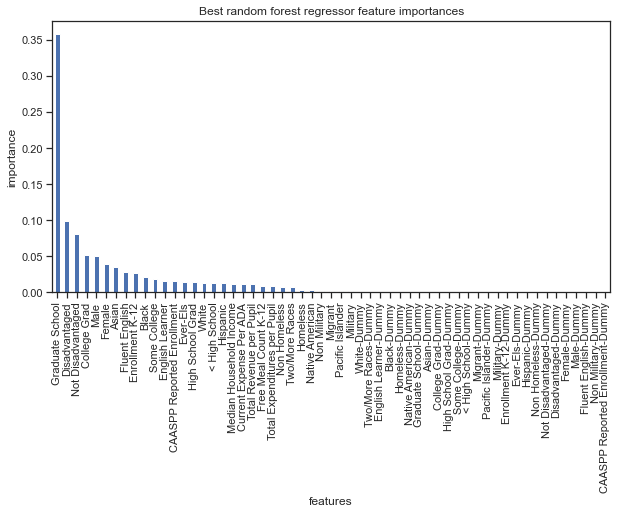

In [45]:
# training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [61]:
# Make predictions
y_te_pred = rf_grid_cv.predict(X_test)
y_tr_pred = rf_grid_cv.predict(X_train)

In [62]:
# MAE
median_mae = mean_absolute_error(y_train, y_tr_pred).round(4), mean_absolute_error(y_test, y_te_pred).round(4)

# MSE - train, test 
median_mse = mean_squared_error(y_train, y_tr_pred).round(4), mean_squared_error(y_test, y_te_pred).round(4)

# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)

#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

In [65]:
print ('Mean Absolute Error - train, test: ' + str(median_mae))
print ('Mean Squared Error - train, test: ' + str(median_mse))
print ('Root Mean Squared Error - train, test: ' + str(median_rmse))
print ('R-square - train, test: ' + str(median_r2))

Mean Absolute Error - train, test: (0.0804, 0.0785)
Mean Squared Error - train, test: (0.0112, 0.0103)
Root Mean Squared Error - train, test: (0.0365, 0.0915)
R-square - train, test: (0.969, 0.7989)


-----------

# PCA

In [50]:
# Define the PCA object  
pca = PCA()    
X_reduced = pca.fit_transform(scale(X))

# Create linear regression object   
regr = linear_model.LinearRegression()

Text(0.5, 1.0, '% of students passing the standards')

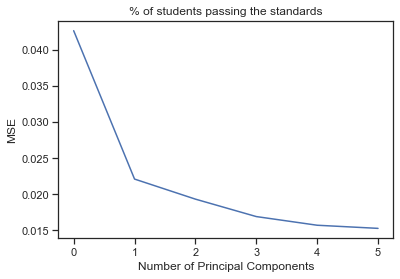

In [59]:
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('% of students passing the standards')

In [58]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 19.05,  29.51,  34.9 ,  39.68,  43.89,  47.95,  51.6 ,  55.03,
        58.08,  60.89,  63.42,  65.57,  67.69,  69.67,  71.53,  73.31,
        74.95,  76.52,  78.02,  79.4 ,  80.73,  81.99,  83.22,  84.36,
        85.47,  86.53,  87.53,  88.5 ,  89.41,  90.29,  91.14,  91.97,
        92.78,  93.59,  94.29,  94.98,  95.58,  96.18,  96.72,  97.23,
        97.68,  98.1 ,  98.5 ,  98.87,  99.19,  99.43,  99.61,  99.77,
        99.89,  99.93,  99.96,  99.98, 100.  , 100.01, 100.01, 100.01,
       100.01])

In [57]:
#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
np.sqrt(mean_squared_error(y_test, pred))


0.14618109244334773

In [66]:
# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)

#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

In [68]:
# print ('Root Mean Squared Error - train, test: ' + str(median_rmse))
# print ('R-square - train, test: ' + str(median_r2))

# LASSO

In [81]:
from numpy import mean
from numpy import std
from numpy import absolute

# define model
model = Lasso(alpha=0)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.081 (0.002)


In [82]:
# fit model
model.fit(X, y)

Lasso(alpha=0)

In [83]:
# Make predictions
y_te_pred = model.predict(X_test)
y_tr_pred = model.predict(X_train)

In [84]:
# MAE
median_mae = mean_absolute_error(y_train, y_tr_pred).round(4), mean_absolute_error(y_test, y_te_pred).round(4)

# MSE - train, test 
median_mse = mean_squared_error(y_train, y_tr_pred).round(4), mean_squared_error(y_test, y_te_pred).round(4)

# RMSE
median_rmse = mean_squared_error(y_train, y_tr_pred, squared=False).round(4), mean_squared_error(y_test, y_te_pred, squared=False).round(4)

#r2
median_r2 = r2_score(y_train, y_tr_pred).round(4), r2_score(y_test, y_te_pred).round(4)

In [85]:
print('Mean Absolute Error - train, test: ' + str(median_mae))
print('Mean Squared Error - train, test: ' + str(median_mse))
print('Root Mean Squared Error - train, test: ' + str(median_rmse))
print('R-square - train, test: ' + str(median_r2))

Mean Absolute Error - train, test: (0.0804, 0.0778)
Mean Squared Error - train, test: (0.0112, 0.0101)
Root Mean Squared Error - train, test: (0.1058, 0.1004)
R-square - train, test: (0.7392, 0.7579)


In [80]:
from numpy import arange

# define model
model = Lasso()

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

# define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X, y)

# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.081
Config: {'alpha': 0.0}


# DECISION TREE

In [88]:
# from sklearn import tree, metrics

# # Create model
# entr_model = tree.DecisionTreeClassifier(criterion='entropy', random_state = 42)

# # Call fit() on entr_model, and pass in X_train and y_train, in that order 
# entr_model.fit(X_train, y_train)

# # Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
# y_pred = entr_model.predict(X_test)

# # Assign y_pred the following: pd.Series(y_pred)
# y_pred = pd.Series(y_pred)

# # Check out entr_model
# entr_model

## LOGISTIC REGRESSION

In [ ]:
# from sklearn import preprocessing
# from sklearn import utils

# lab_enc = preprocessing.LabelEncoder()
# encoded = lab_enc.fit_transform(----)



In [ ]:
# C_param_range = [0.001,0.01,0.1,1,10,100]

# table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
# table['C_parameter'] = C_param_range


# j = 0
# for i in C_param_range:
    
#     # Apply logistic regression model to training data
#     Logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 40)
#     Logreg.fit(X_train,y_train)
    
#     # Predict using model
#     y_pred_lr = Logreg.predict(X_test)
    
#     # Saving accuracy score in table
#     table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
#     j += 1
    
# table


In [ ]:
# cv_scores_test= cross_val_score(Logreg,X_test,y_test,cv=5,scoring='roc_auc')
# cv_scores_train= cross_val_score(Logreg,X_train,y_train,cv=5,scoring='roc_auc')
# print(cv_scores_test)
# cv_scores_lr_test= cv_scores_test.mean()
# cv_scores_lr_train= cv_scores_train.mean()
# cv_scores_std_test_lr= cv_scores_test.std()
# print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
# print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
# print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

# GRADIENT BOOSTING